In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
data=pd.read_csv("Tweets.csv")
data = data[['airline_sentiment', 'text']]

In [3]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [4]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
import re

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
#set stopwords to english

stop_wr=set(stopwords.words('english'))

In [9]:
#Removing the noisy text
def noiseremoval_text(text):
  #text = text.strip("@VirginAmerica")
  text = re.sub('\[[^]]*\]@:/', '', str(text))
  return text

In [10]:
data['text']=data['text'].apply(noiseremoval_text)

In [11]:
#removing the stopwords
def removing_stopwords(text, is_lower_case=False):
    #Tokenization of text
    tokenizers=ToktokTokenizer()
    #Setting English stopwords
    tokens = tokenizers.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filter_tokens = [token for token in tokens if token not in stop_wr and not(token.isdigit())]
    else:
        filter_tokens = [token for token in tokens if token.lower() not in stop_wr and not(token.isdigit())]
    filtered_text = ' '.join(filter_tokens)    
    return filtered_text

In [12]:
data['text']=data['text'].apply(removing_stopwords)

In [13]:
#lemmatize the text
def lem(text):
  lm = WordNetLemmatizer()
  text= ' '.join([lm.lemmatize(word) for word in text.split()])
  return text

In [14]:
data['text']=data['text'].apply(lem)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X = vectorizer.fit_transform(data['text'])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, data['airline_sentiment'], test_size=0.2)

In [17]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'neutral'], dtype='<U8')

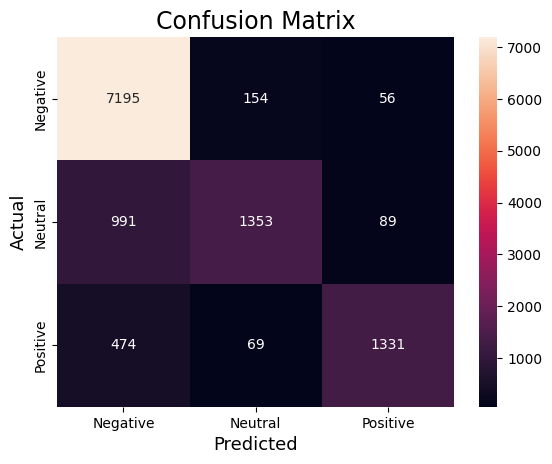

In [19]:
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [20]:
y_predict_test = NB_classifier.predict(X_test)
#y_predict_test
unique_values, counts = np.unique(y_predict_test, return_counts=True)

# Print the counts for each unique value
for value, count in zip(unique_values, counts):
    print("Value:", value, "Count:", count)

Value: negative Count: 2181
Value: neutral Count: 419
Value: positive Count: 328


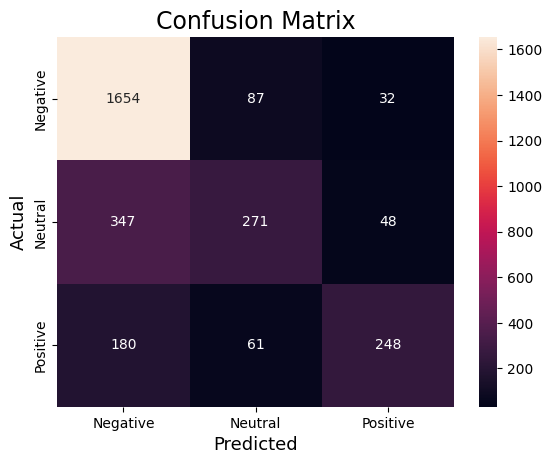

In [21]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [22]:
print(classification_report(y_test, y_predict_test, digits=3))

              precision    recall  f1-score   support

    negative      0.758     0.933     0.837      1773
     neutral      0.647     0.407     0.500       666
    positive      0.756     0.507     0.607       489

    accuracy                          0.742      2928
   macro avg      0.720     0.616     0.648      2928
weighted avg      0.733     0.742     0.722      2928



In [27]:
a = input("Enter the sentence: ")
a = lem(a)
a = removing_stopwords(a)
a = [a]
a = vectorizer.transform(a)
pred = NB_classifier.predict(a)
print(pred[0])

Enter the sentence: it's ok
negative
